Natalie LaLuzerne

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters

Constants

In [2]:
atlantic_directory = r'C:\Users\nlalu\Documents\EECS_731\DataExplorer\Data\atlantic.csv'
pacific_directory = r'C:\Users\nlalu\Documents\EECS_731\DataExplorer\Data\pacific.csv'
hurricane_directory = r'C:\Users\nlalu\Documents\EECS_731\DataExplorer\Data\hurricane.csv'
atlantic_max_winds_directory = r'C:\Users\nlalu\Documents\EECS_731\DataExplorer\Data\atlantic_max_winds.csv'
pacific_max_winds_directory = r'C:\Users\nlalu\Documents\EECS_731\DataExplorer\Data\pacific_max_winds.csv'
atlantic_min_pressure_directory = r'C:\Users\nlalu\Documents\EECS_731\DataExplorer\Data\atlantic_min_pressure.csv'
pacific_min_pressure_directory = r'C:\Users\nlalu\Documents\EECS_731\DataExplorer\Data\pacific_min_pressure.csv'
max_winds_directory = r'C:\Users\nlalu\Documents\EECS_731\DataExplorer\Data\max_winds.csv'
min_pressure_directory = r'C:\Users\nlalu\Documents\EECS_731\DataExplorer\Data\min_pressure.csv'

Read in datasets

In [3]:
atlantic_data = pd.read_csv( atlantic_directory )
pacific_data = pd.read_csv( pacific_directory )

Filter data sets for hurricanes only (data sets contain information for topical storms, tropical depressions, and Post-Tropical Cyclones. For this project, I am only concerned with hurricanes

In [4]:
is_atlantic_hurricane = atlantic_data[ 'Status' ].str.contains( "HU" )
is_pacific_hurricane = pacific_data[ 'Status' ].str.contains( "HU" )

atlantic_hurricanes = atlantic_data[ is_atlantic_hurricane ]
pacific_hurricanes = pacific_data[ is_pacific_hurricane ]

The atlantic data set goes farther back in time than the pacific data set. For comparison purposes, only consider the same time frame

In [5]:
atlantic_timeframe = atlantic_hurricanes[ 'Date' ] >= 19490611

atlantic_hurricanes = atlantic_hurricanes[ atlantic_timeframe ]

Combine the date and time columns to create a date/time string and format for equal length and 4-digit
UTC time

In [6]:
atlantic_hurricanes = atlantic_hurricanes.assign( Timestamp = pd.Series( atlantic_hurricanes[ 'Date' ].map( str ) + atlantic_hurricanes[ 'Time' ].map( str ) ).values ) 
pacific_hurricanes = pacific_hurricanes.assign( Timestamp = pd.Series( pacific_hurricanes[ 'Date' ].map( str ) + pacific_hurricanes[ 'Time' ].map( str ) ).values ) 

atlantic_hurricanes[ 'Timestamp' ] = atlantic_hurricanes.Timestamp.apply( lambda t: t + '000' if len( t ) == 9 else t )
atlantic_hurricanes[ 'Timestamp' ] = atlantic_hurricanes.Timestamp.apply( lambda t: t[:8] + '0' + t[8:] if len( t ) == 11 else t )

pacific_hurricanes[ 'Timestamp' ] = pacific_hurricanes.Timestamp.apply( lambda t: t + '000' if len( t ) == 9 else t )
pacific_hurricanes[ 'Timestamp' ] = pacific_hurricanes.Timestamp.apply( lambda t: t[:8] + '0' + t[8:] if len( t ) == 11 else t )

atlantic_hurricanes[ 'Timestamp'] = atlantic_hurricanes.Timestamp.apply( lambda t: datetime.datetime.strptime( t, '%Y%m%d%H%M' ) )
pacific_hurricanes[ 'Timestamp'] = pacific_hurricanes.Timestamp.apply( lambda t: datetime.datetime.strptime( t, '%Y%m%d%H%M' ) )

Since there are generally mulitple measurements for each hurricane, filter the data sets for the maximum wind measurement for each hurricane and for the minimum central pressure for each hurricane

In [7]:
atlantic_hurricanes_wind = atlantic_hurricanes.sort_values('Maximum Wind', ascending=False ).drop_duplicates( [ 'ID' ] )
pacific_hurricanes_wind = pacific_hurricanes.sort_values('Maximum Wind', ascending=False ).drop_duplicates( [ 'ID' ] )

atlantic_hurricanes_pressure = atlantic_hurricanes.sort_values('Minimum Pressure', ascending=True ).drop_duplicates( [ 'ID' ] )
pacific_hurricanes_pressure = pacific_hurricanes.sort_values('Minimum Pressure', ascending=True ).drop_duplicates( [ 'ID' ] )

In [8]:
atlantic_missing_records = atlantic_hurricanes_pressure[ 'Minimum Pressure' ] != -999
pacific_missing_records = pacific_hurricanes_pressure[ 'Minimum Pressure' ] != -999

atlantic_hurricanes_pressure = atlantic_hurricanes_pressure[ atlantic_missing_records ]
pacific_hurricanes_pressure = pacific_hurricanes_pressure[ pacific_missing_records ]

Calculate basic statistics on the maximum recorded wind speeds in both data sets

In [9]:
atlantic_max_wind = atlantic_hurricanes_wind[ 'Maximum Wind' ].max()
atlantic_median_wind = atlantic_hurricanes_wind[ 'Maximum Wind' ].median()
atlantic_mean_wind = atlantic_hurricanes_wind[ 'Maximum Wind' ].mean()
atlantic_std_wind = atlantic_hurricanes_wind[ 'Maximum Wind' ].std()

pacific_max_wind = pacific_hurricanes_wind[ 'Maximum Wind' ].max()
pacific_median_wind = pacific_hurricanes_wind[ 'Maximum Wind' ].median()
pacific_mean_wind = pacific_hurricanes_wind[ 'Maximum Wind' ].mean()
pacific_std_wind = pacific_hurricanes_wind[ 'Maximum Wind' ].std()

Calculate basic statistics on the minimum recorded central pressure in both data sets

In [10]:
atlantic_max_pressure = atlantic_hurricanes_pressure[ 'Minimum Pressure' ].max()
atlantic_min_pressure = atlantic_hurricanes_pressure[ 'Minimum Pressure' ].min()
atlantic_median_pressure = atlantic_hurricanes_pressure[ 'Minimum Pressure' ].median()
atlantic_mean_pressure = atlantic_hurricanes_pressure[ 'Minimum Pressure' ].mean()
atlantic_std_pressure = atlantic_hurricanes_pressure[ 'Minimum Pressure' ].std()

pacific_max_pressure = pacific_hurricanes_pressure[ 'Minimum Pressure' ].max()
pacific_min_pressure = pacific_hurricanes_pressure[ 'Minimum Pressure' ].min()
pacific_median_pressure = pacific_hurricanes_pressure[ 'Minimum Pressure' ].median()
pacific_mean_pressure = pacific_hurricanes_pressure[ 'Minimum Pressure' ].mean()
pacific_std_pressure = pacific_hurricanes_pressure[ 'Minimum Pressure' ].std()

Combine the original data sets into one data set

In [11]:
datasets = [ atlantic_data, pacific_data ]
hurricane_data = pd.concat( datasets )

Instead of re-performing scrubbing process on new combined data set, combined the already scrubbed data sets into one to use for plotting

In [12]:
maximum_wind_sets = [ atlantic_hurricanes_wind, pacific_hurricanes_wind ]
maximum_wind_data = pd.concat( maximum_wind_sets )

minimum_pressure_sets = [ atlantic_hurricanes_pressure, pacific_hurricanes_pressure ]
minimum_pressure_data = pd.concat( minimum_pressure_sets )

Calculate basic statistics on the maximum recorded wind speeds in the combined data sets

In [13]:
max_wind = maximum_wind_data[ 'Maximum Wind' ].max()
median_wind = maximum_wind_data[ 'Maximum Wind' ].median()
mean_wind = maximum_wind_data[ 'Maximum Wind' ].mean()
std_wind = maximum_wind_data[ 'Maximum Wind' ].std()

Calculate basic statistics on the minimum recorded central pressure in the combined data sets

In [14]:
max_pressure = minimum_pressure_data[ 'Minimum Pressure' ].max()
min_pressure = minimum_pressure_data[ 'Minimum Pressure' ].min()
median_pressure = minimum_pressure_data[ 'Minimum Pressure' ].median()
mean_pressure = minimum_pressure_data[ 'Minimum Pressure' ].mean()
std_pressure = minimum_pressure_data[ 'Minimum Pressure' ].std()

Plot the Maximum Wind Speed of Hurricanes in the Atlantic and Pacific Oceans

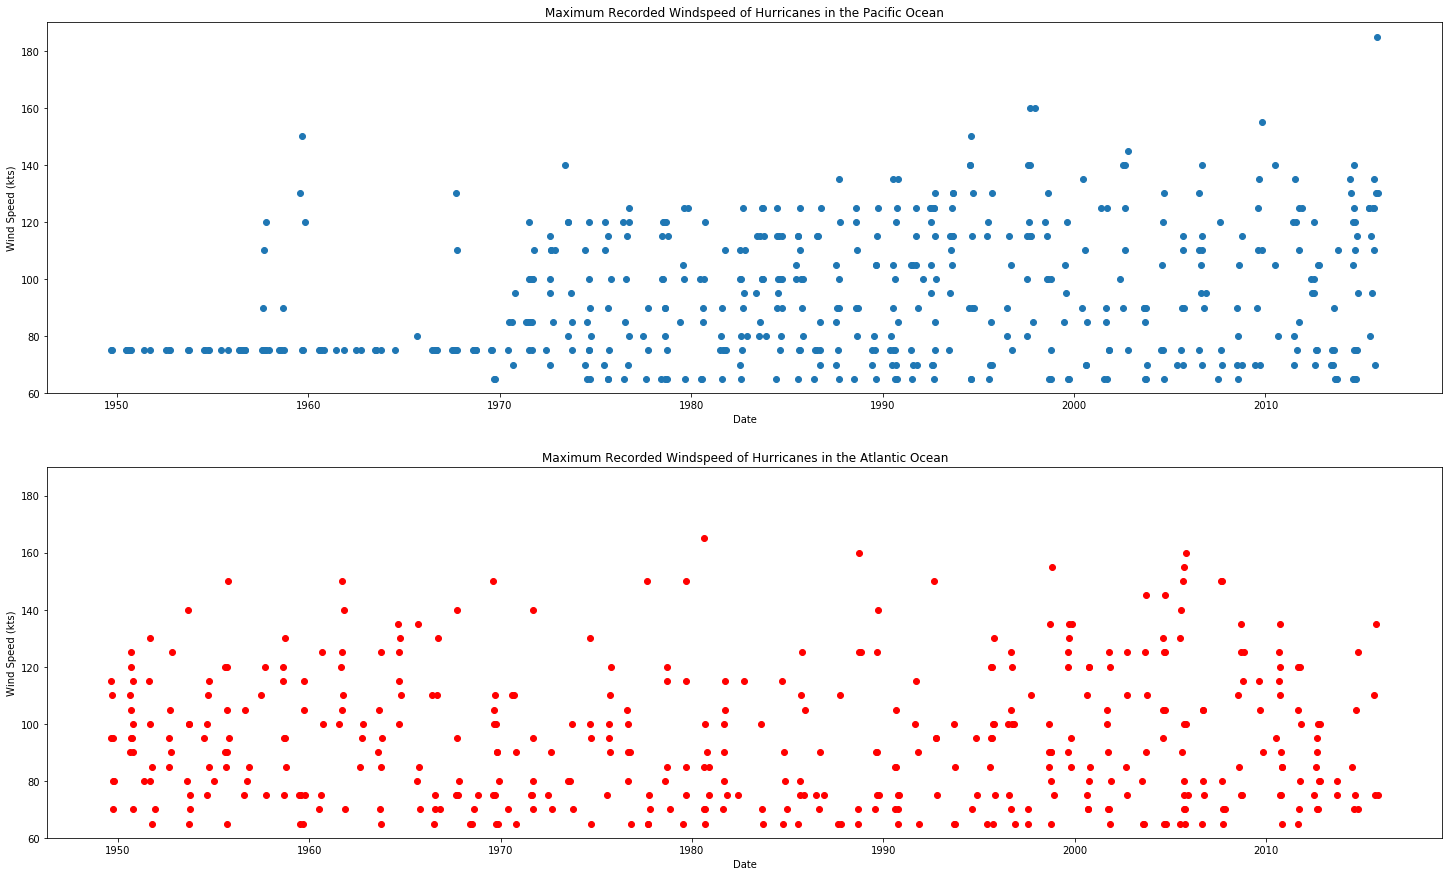

In [15]:
register_matplotlib_converters()

fig = plt.figure( figsize=[ 25, 15 ] )
ax1 = plt.subplot( 211 )
ax1.scatter( pacific_hurricanes_wind[ 'Timestamp' ], pacific_hurricanes_wind[ 'Maximum Wind' ] )
ax1.set_ylim( [ 60, 190 ] )
ax1.set_title( "Maximum Recorded Windspeed of Hurricanes in the Pacific Ocean" )
ax1.set_xlabel( "Date" )
ax1.set_ylabel( "Wind Speed (kts)")
ax2 = plt.subplot(212)
ax2.scatter( atlantic_hurricanes_wind[ 'Timestamp' ], atlantic_hurricanes_wind[ 'Maximum Wind' ], color='r' )
ax2.set_ylim( [ 60, 190 ] )
ax2.set_title( "Maximum Recorded Windspeed of Hurricanes in the Atlantic Ocean" )
ax2.set_xlabel( "Date" )
ax2.set_ylabel( "Wind Speed (kts)")
plt.show()

Print out the statistics on the maximum recorded wind speeds of hurricanes in each ocean

In [16]:
print( '\033[4m{:10s}\033[0m'.format( 'Pacific Ocean' ) )
print( '\tMaximum Maximum Wind Speed: {}'.format( pacific_max_wind ) )
print( '\tMedian Maximum Wind Speed: {0:.1f}'.format( pacific_median_wind ) )
print( '\tAverage Maximum Wind Speed: {0:.2f}'.format( pacific_mean_wind ) )
print( '\tStandard Deviation Maximum Wind Speed: {0:.2f}'.format( pacific_std_wind ) )

print( '\n' )

print( '\033[4m{:10s}\033[0m'.format( 'Atlantic Ocean' ) )
print( '\tMaximum Maximum Wind Speed: {}'.format( atlantic_max_wind ) )
print( '\tMedian Maximum Wind Speed: {0:.1f}'.format( atlantic_median_wind ) )
print( '\tAverage Maximum Wind Speed: {0:.2f}'.format( atlantic_mean_wind ) )
print( '\tStandard Deviation Maximum Wind Speed: {0:.2f}'.format( atlantic_std_wind ) )

Pacific Ocean
	Maximum Maximum Wind Speed: 185
	Median Maximum Wind Speed: 90.0
	Average Maximum Wind Speed: 93.52
	Standard Deviation Maximum Wind Speed: 22.75


Atlantic Ocean
	Maximum Maximum Wind Speed: 165
	Median Maximum Wind Speed: 90.0
	Average Maximum Wind Speed: 94.10
	Standard Deviation Maximum Wind Speed: 23.53


Plot the Minimum Central Pressure of Hurricanes in the Atlantic and Pacific Oceans

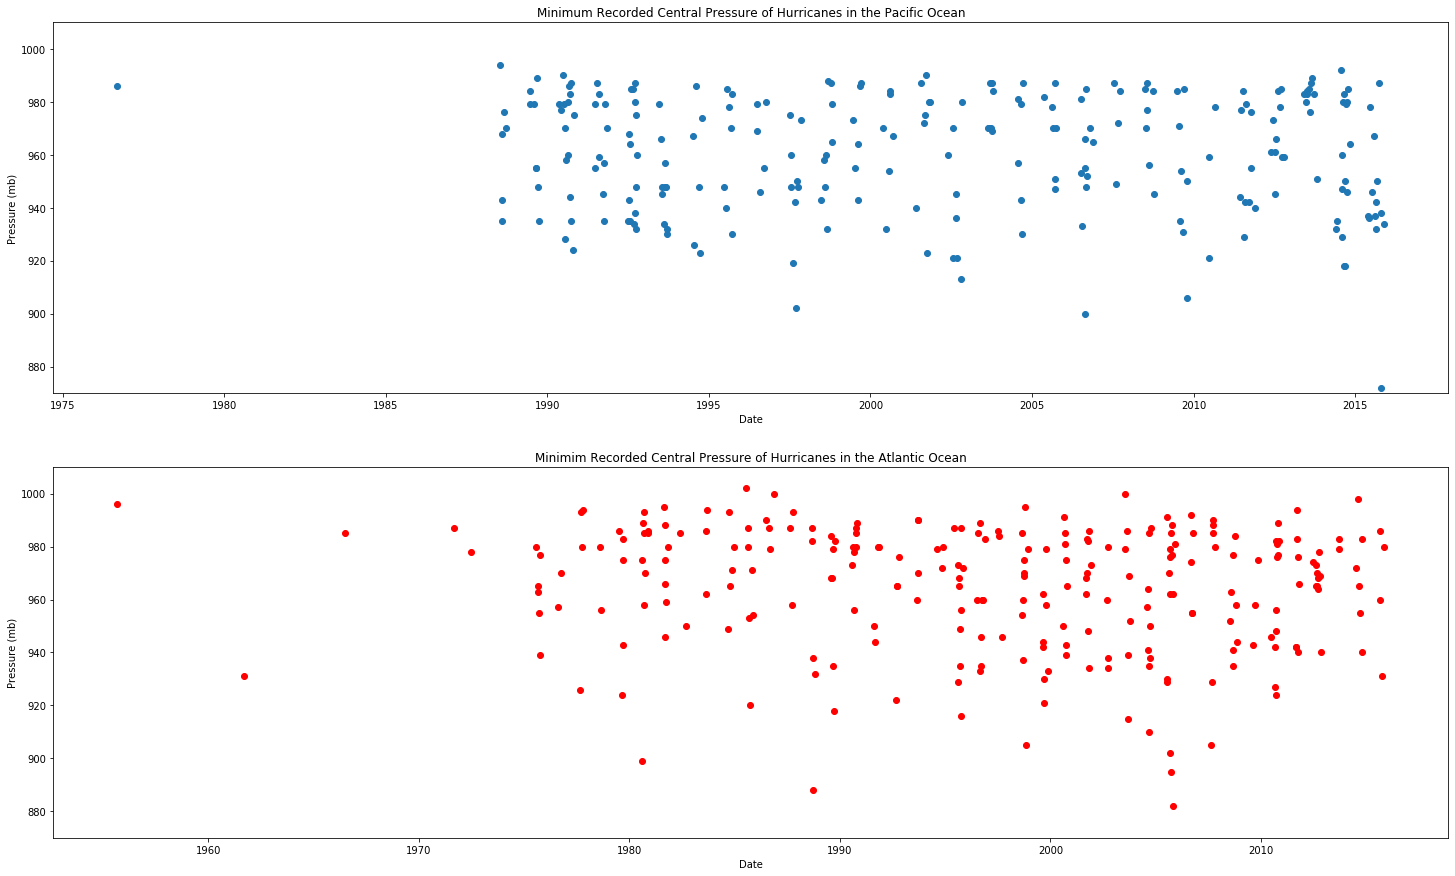

In [17]:
fig = plt.figure( figsize=[25,15] )
ax1 = plt.subplot( 211 )
ax1.scatter( pacific_hurricanes_pressure[ 'Timestamp' ], pacific_hurricanes_pressure[ 'Minimum Pressure' ] )
ax1.set_ylim( [ 870, 1010 ] )
ax1.set_title( "Minimum Recorded Central Pressure of Hurricanes in the Pacific Ocean" )
ax1.set_xlabel( "Date" )
ax1.set_ylabel( "Pressure (mb)")
ax2 = plt.subplot(212)
ax2.scatter( atlantic_hurricanes_pressure[ 'Timestamp' ], atlantic_hurricanes_pressure[ 'Minimum Pressure' ], color='r' )
ax2.set_ylim( [ 870, 1010 ] )
ax2.set_title( "Minimim Recorded Central Pressure of Hurricanes in the Atlantic Ocean" )
ax2.set_xlabel( "Date" )
ax2.set_ylabel( "Pressure (mb)")
plt.show()

Print out the statistics on the minimum recorded central pressure of hurricanes in each ocean

In [18]:
print( '\033[4m{:10s}\033[0m'.format( 'Pacific Ocean' ) )
print( '\tMaximim Minimum Pressure: {}'.format( pacific_max_pressure ) )
print( '\tMinimum Minimum Pressure: {}'.format( pacific_min_pressure ) )
print( '\tMedian Minimum Pressure: {0:.1f}'.format( pacific_median_pressure ) )
print( '\tAverage Minimum Pressure: {0:.2f}'.format( pacific_mean_pressure ) )
print( '\tStandard Deviation Minimum Pressure: {0:.2f}'.format( pacific_std_pressure ) )

print( '\n' )

print( '\033[4m{:10s}\033[0m'.format( 'Atlantic Ocean' ) )
print( '\tMaximum Minimum Pressure: {}'.format( atlantic_max_pressure ) )
print( '\tMinimum Minimum Pressure: {}'.format( atlantic_min_pressure ) )
print( '\tMedian Minimum Pressure: {0:.1f}'.format( atlantic_median_pressure ) )
print( '\tAverage Minimum Pressure: {0:.2f}'.format( atlantic_mean_pressure ) )
print( '\tStandard Deviation Minimum Pressure: {0:.2f}'.format( atlantic_std_pressure ) )

Pacific Ocean
	Maximim Minimum Pressure: 994
	Minimum Minimum Pressure: 872
	Median Minimum Pressure: 965.0
	Average Minimum Pressure: 960.67
	Standard Deviation Minimum Pressure: 22.02


Atlantic Ocean
	Maximum Minimum Pressure: 1002
	Minimum Minimum Pressure: 882
	Median Minimum Pressure: 970.0
	Average Minimum Pressure: 964.25
	Standard Deviation Minimum Pressure: 23.40


Plot the relationship between maximum wind speed and minimum pressure at the minimim pressure of hurricanes in the Atlantic and Pacific Oceans

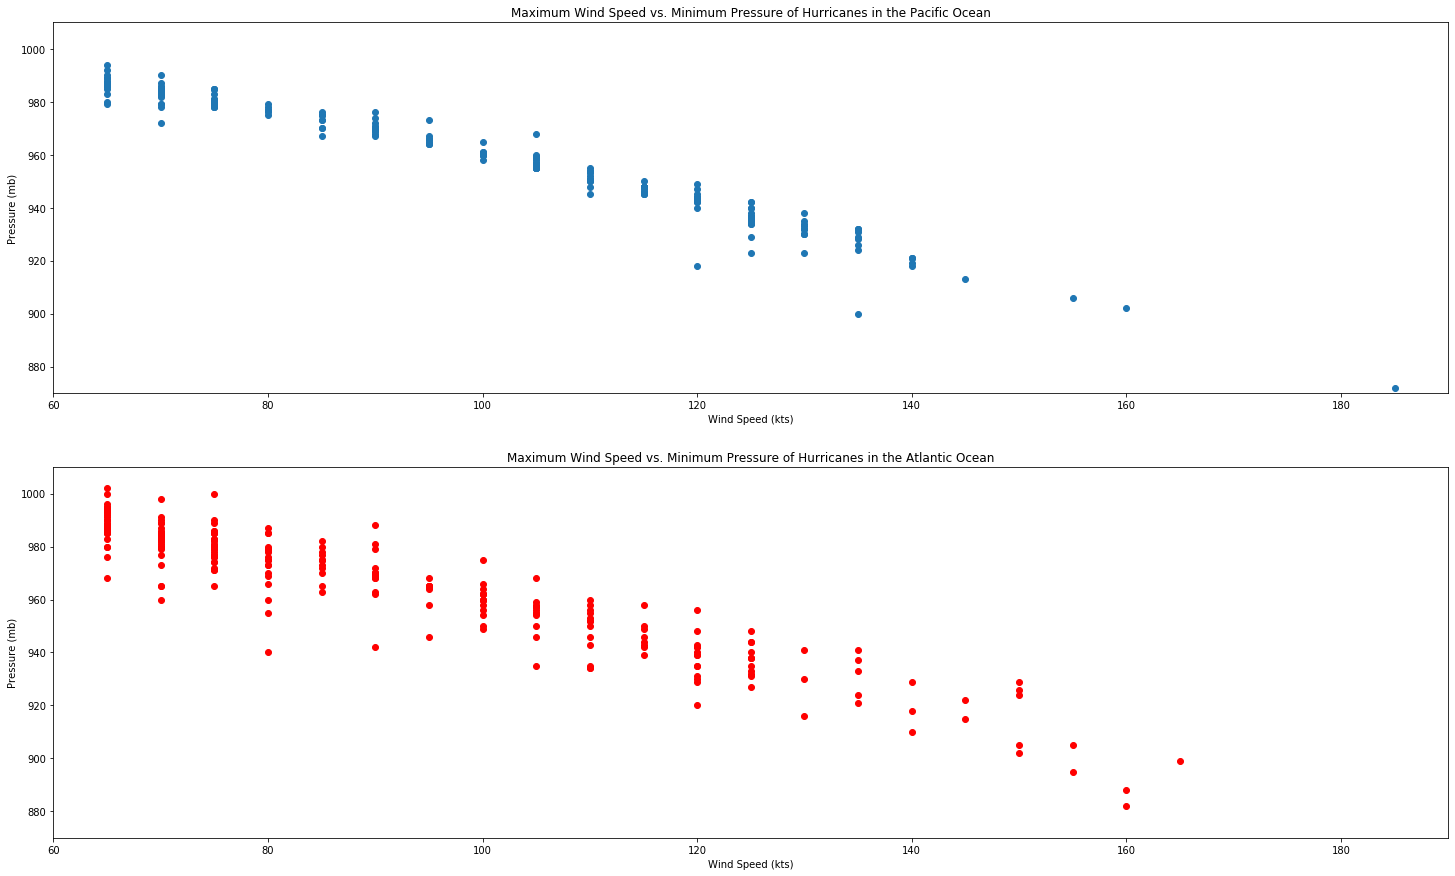

In [19]:
fig = plt.figure( figsize=[25,15] )
ax1 = plt.subplot( 211 )
ax1.scatter( pacific_hurricanes_pressure[ 'Maximum Wind' ], pacific_hurricanes_pressure[ 'Minimum Pressure' ] )
ax1.set_xlim( [ 60, 190 ] )
ax1.set_ylim( [ 870, 1010 ] )
ax1.set_title( "Maximum Wind Speed vs. Minimum Pressure of Hurricanes in the Pacific Ocean" )
ax1.set_xlabel( "Wind Speed (kts)" )
ax1.set_ylabel( "Pressure (mb)")
ax2 = plt.subplot(212)
ax2.scatter( atlantic_hurricanes_pressure[ 'Maximum Wind' ], atlantic_hurricanes_pressure[ 'Minimum Pressure' ], color='r' )
ax2.set_xlim( [ 60, 190 ] )
ax2.set_ylim( [ 870, 1010 ] )
ax2.set_title( "Maximum Wind Speed vs. Minimum Pressure of Hurricanes in the Atlantic Ocean" )
ax2.set_xlabel( "Wind Speed (kts)" )
ax2.set_ylabel( "Pressure (mb)")
plt.show()

Plot the Maximum Wind Speed of all hurricanes

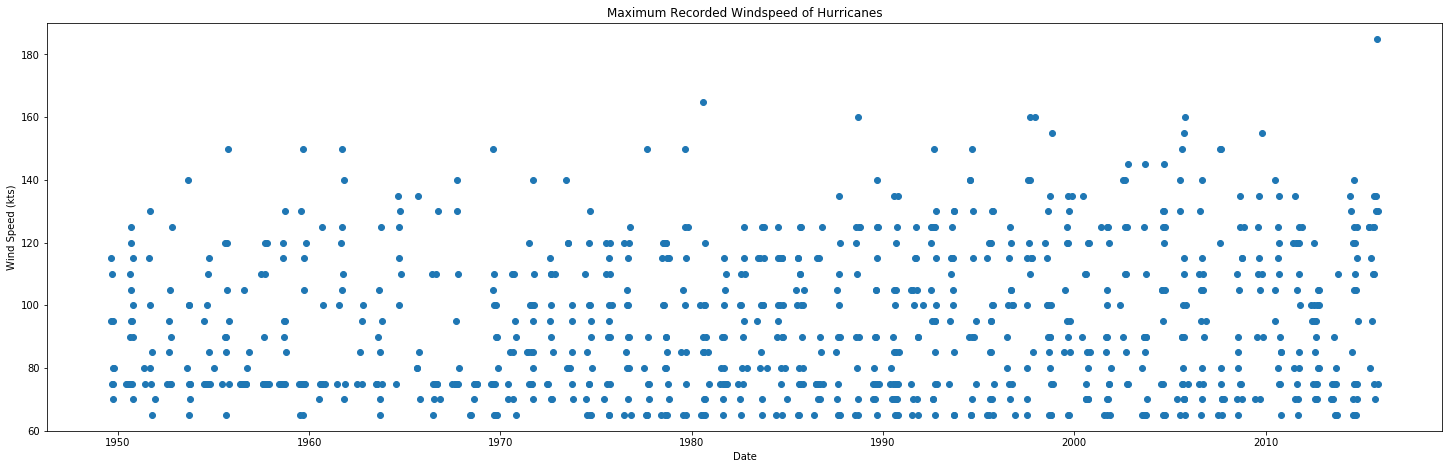

In [20]:
fig = plt.figure( figsize=[ 25, 7.5 ] )
ax1 = plt.subplot( 111 )
ax1.scatter( maximum_wind_data[ 'Timestamp' ], maximum_wind_data[ 'Maximum Wind' ] )
ax1.set_ylim( [ 60, 190 ] )
ax1.set_title( "Maximum Recorded Windspeed of Hurricanes" )
ax1.set_xlabel( "Date" )
ax1.set_ylabel( "Wind Speed (kts)")
plt.show()

Print out the statistics on the maximum recorded wind speeds of all hurricanes

In [21]:
print( 'Maximum Maximum Wind Speed: {}'.format( max_wind ) )
print( 'Median Maximum Wind Speed: {0:.1f}'.format( median_wind ) )
print( 'Average Maximum Wind Speed: {0:.2f}'.format( mean_wind ) )
print( 'Standard Deviation Maximum Wind Speed: {0:.2f}'.format( std_wind ) )

Maximum Maximum Wind Speed: 185
Median Maximum Wind Speed: 90.0
Average Maximum Wind Speed: 93.78
Standard Deviation Maximum Wind Speed: 23.09


Plot the Minimum Central Pressure of all hurricanes

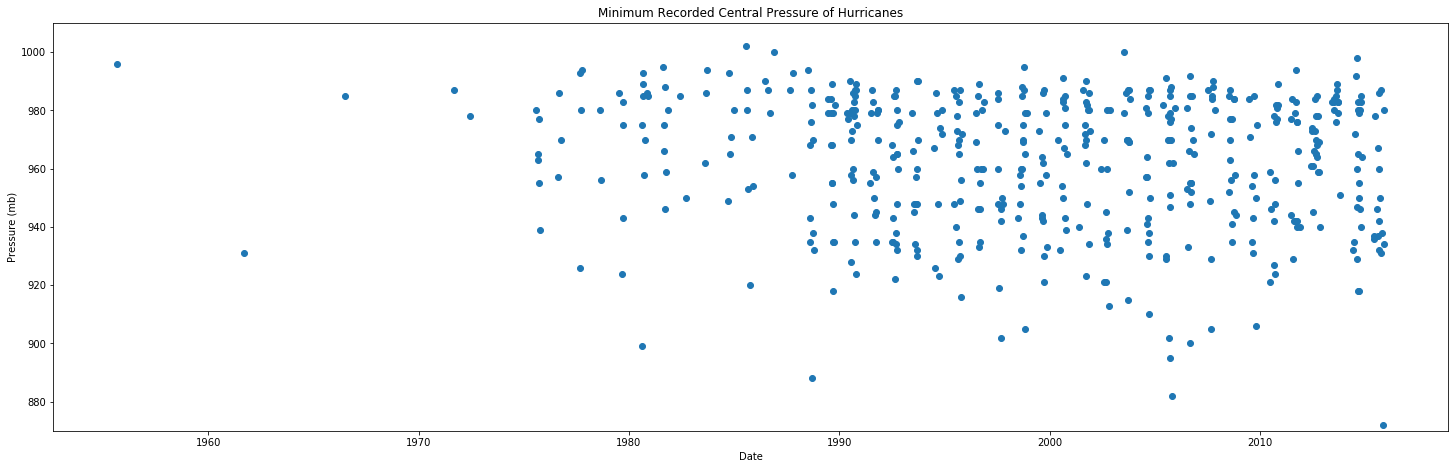

In [22]:
fig = plt.figure( figsize=[25,7.5] )
ax1 = plt.subplot( 111 )
ax1.scatter( minimum_pressure_data[ 'Timestamp' ], minimum_pressure_data[ 'Minimum Pressure' ] )
ax1.set_ylim( [ 870, 1010 ] )
ax1.set_title( "Minimum Recorded Central Pressure of Hurricanes" )
ax1.set_xlabel( "Date" )
ax1.set_ylabel( "Pressure (mb)")
plt.show()

Print out the statistics on the minimum recorded central pressure of all hurricanes

In [23]:
print( 'Maximim Minimum Pressure: {}'.format( max_pressure ) )
print( 'Minimum Minimum Pressure: {}'.format( min_pressure ) )
print( 'Median Minimum Pressure: {0:.1f}'.format( median_pressure ) )
print( 'Average Minimum Pressure: {0:.2f}'.format( mean_pressure ) )
print( 'Standard Deviation Minimum Pressure: {0:.2f}'.format( std_pressure ) )

Maximim Minimum Pressure: 1002
Minimum Minimum Pressure: 872
Median Minimum Pressure: 968.0
Average Minimum Pressure: 962.51
Standard Deviation Minimum Pressure: 22.79


Plot the relationship between maximum wind speed and minimum pressure at the minimim pressure of all hurricanes

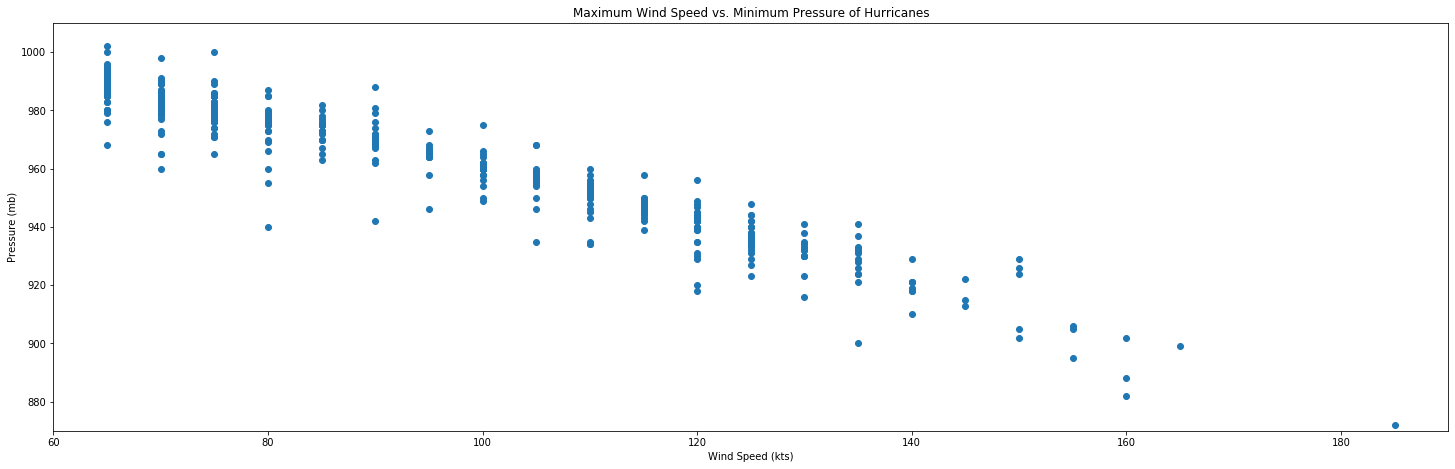

In [24]:
fig = plt.figure( figsize=[25,7.5] )
ax1 = plt.subplot( 111 )
ax1.scatter( minimum_pressure_data[ 'Maximum Wind' ], minimum_pressure_data[ 'Minimum Pressure' ] )
ax1.set_xlim( [ 60, 190 ] )
ax1.set_ylim( [ 870, 1010 ] )
ax1.set_title( "Maximum Wind Speed vs. Minimum Pressure of Hurricanes" )
ax1.set_xlabel( "Wind Speed (kts)" )
ax1.set_ylabel( "Pressure (mb)")
plt.show()

Save all newly created data sets

In [25]:
atlantic_hurricanes_wind.to_csv( path_or_buf=atlantic_max_winds_directory, index=False )
pacific_hurricanes_wind.to_csv( path_or_buf=pacific_max_winds_directory, index=False )
atlantic_hurricanes_pressure.to_csv( path_or_buf=atlantic_min_pressure_directory, index=False )
pacific_hurricanes_pressure.to_csv( path_or_buf=pacific_min_pressure_directory, index=False )
hurricane_data.to_csv( path_or_buf=hurricane_directory, index=False )
maximum_wind_data.to_csv( path_or_buf=max_winds_directory, index=False )
minimum_pressure_data.to_csv( path_or_buf=min_pressure_directory, index=False )